In [1]:
import tensorflow as tw
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as ny

In [2]:
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

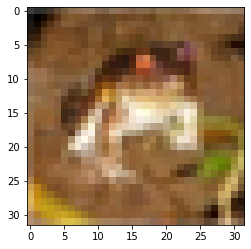

In [4]:
# plt.figure(figsize = (1, 2))
plt.imshow(xtrain[0])

In [5]:
classes =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
ytrain = ytrain.reshape(-1, )
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

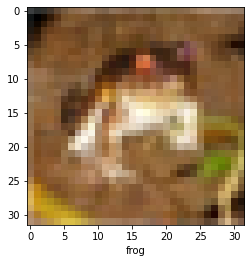

In [8]:
def image(x, y, index):
  # plt.figure(figsize = (15, 1))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

image(xtrain, ytrain, 0)

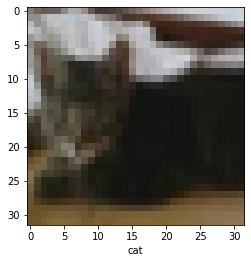

In [9]:
image(xtrain, ytrain, 9)

In [10]:
xtrain = xtrain/255
xtest = xtest/255

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann.fit(xtrain, ytrain,  epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8203 - accuracy: 0.3536
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6292 - accuracy: 0.4252
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5462 - accuracy: 0.4546
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4866 - accuracy: 0.4758
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4349 - accuracy: 0.4957
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3927 - accuracy: 0.5117
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3542 - accuracy: 0.5235
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3170 - accuracy: 0.5394
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2843 - accuracy: 0.5474
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.25

In [12]:
ann.evaluate(xtest, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.4640 - accuracy: 0.4808


[1.4640034437179565, 0.48080000281333923]

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as ny
ypred = ann.predict(xtest)
ypredclasses = [ny.argmax(element)  for element in ypred]

print('Classification Report: \n', classification_report(ytest, ypredclasses))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.58      0.60      1000
           1       0.73      0.54      0.62      1000
           2       0.46      0.33      0.39      1000
           3       0.23      0.75      0.35      1000
           4       0.61      0.25      0.36      1000
           5       0.44      0.29      0.35      1000
           6       0.56      0.54      0.55      1000
           7       0.74      0.39      0.51      1000
           8       0.72      0.51      0.60      1000
           9       0.56      0.62      0.59      1000

    accuracy                           0.48     10000
   macro avg       0.57      0.48      0.49     10000
weighted avg       0.57      0.48      0.49     10000



In [14]:
cnn = models.Sequential([
    
    layers.Conv2D(filters =32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.fit(xtrain, ytrain,  epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4151 - accuracy: 0.4870
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0089 - accuracy: 0.6465
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7768 - accuracy: 0.7277
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5659 - accuracy: 0.8011
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.3646 - accuracy: 0.8715
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2228 - accuracy: 0.9223
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1521 - accuracy: 0.9484
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1296 - accuracy: 0.9567
Epoch 9/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1086 - accuracy: 0.9638
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.09

In [15]:
cnn.evaluate(xtest, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.8069 - accuracy: 0.6910


[1.8068630695343018, 0.6909999847412109]

In [16]:
ypred = cnn.predict(xtest)
ypredclasses = [ny.argmax(element)  for element in ypred]

print('Classification Report: \n', classification_report(ytest, ypredclasses))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.72      0.74      1000
           1       0.86      0.76      0.81      1000
           2       0.60      0.54      0.57      1000
           3       0.53      0.41      0.46      1000
           4       0.63      0.67      0.65      1000
           5       0.55      0.63      0.59      1000
           6       0.78      0.76      0.77      1000
           7       0.72      0.78      0.75      1000
           8       0.72      0.86      0.79      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [17]:
ypred = cnn.predict(xtest)
ypred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.6207929e-08, 7.5593844e-06, 8.2165061e-05, 9.8811209e-01,
        4.8281599e-06, 1.1518800e-02, 2.8761127e-05, 2.8321601e-05,
        4.7131775e-06, 2.1273638e-04],
       [7.4308109e-04, 7.0125121e-03, 1.0086500e-08, 3.8498587e-09,
        9.9198250e-09, 3.1310952e-09, 8.8332349e-08, 1.2031261e-10,
        9.9151742e-01, 7.2691060e-04],
       [2.4488117e-03, 1.1183643e-03, 3.6686521e-05, 3.1093621e-06,
        3.9185488e-04, 1.6306402e-06, 6.3458697e-06, 4.0063664e-05,
        9.9585849e-01, 9.4608520e-05],
       [9.9144179e-01, 2.5256803e-09, 3.4079267e-04, 2.6071143e-07,
        1.8059325e-06, 6.9223249e-10, 1.9087321e-09, 1.0536054e-09,
        8.2152933e-03, 3.8715080e-09],
       [4.3983133e-09, 9.6225385e-08, 4.7154204e-04, 4.2932816e-02,
        9.4273525e-01, 2.6713310e-06, 1.3857336e-02, 1.4707789e-10,
        2.4305086e-07, 1.7428777e-08]], dtype=float32)

In [18]:
ny.argmax(ypred[0])

3

In [19]:
yclasses = [ny.argmax(element) for element in ypred]

In [20]:
yclasses[:6]

[3, 8, 8, 0, 4, 6]

In [21]:
ytest = ytest.reshape(-1, )
ytest[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)

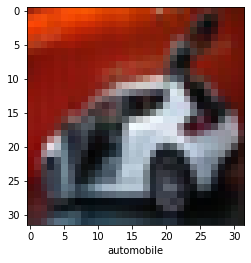

In [22]:
image(xtest, ytest, 6)

In [23]:
classes[yclasses[6]]

'dog'